In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
# Инициализация
w, h = 50, 50
n_left, n_right = 1000, 1000
T = 1000


In [3]:
# Создаём словарь, чтобы сопоставить типы жителей с цветами.
color_map = {'none': (0, 0, 0), 'left': (100, 150, 100), 'right': (200, 200, 100)}


Initial State:


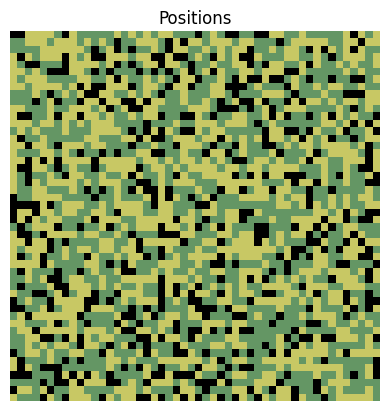

unsatisfied = 0.0


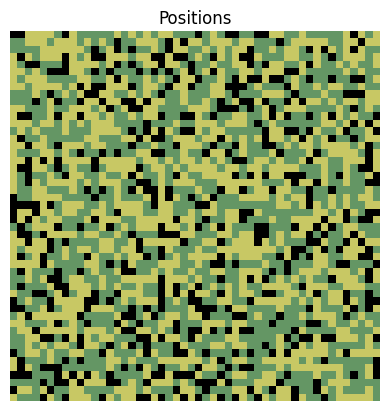

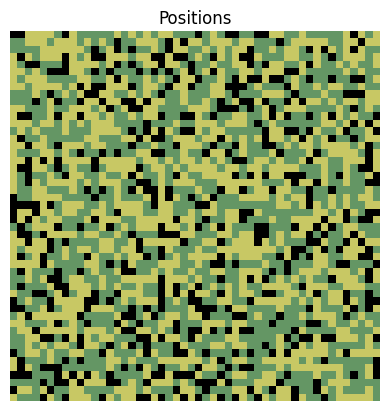

Initial State:


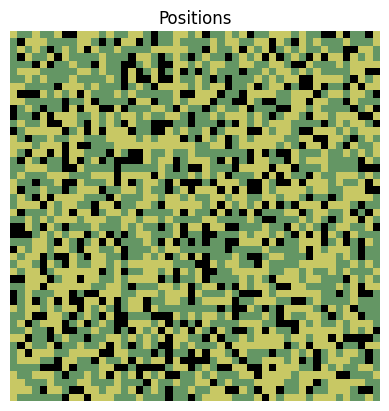

unsatisfied = 0.022


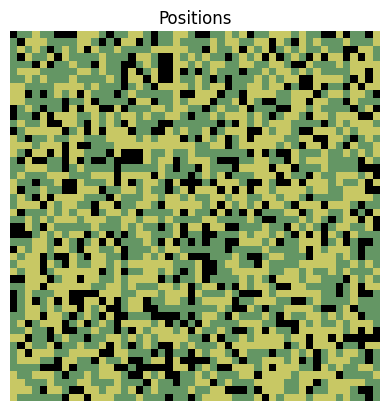

unsatisfied = 0.0005


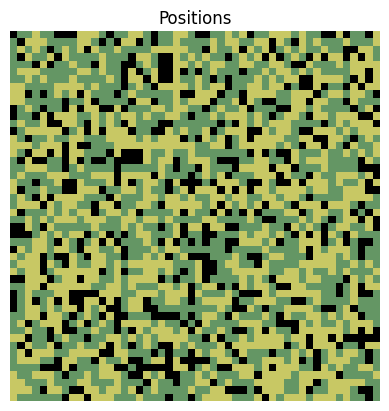

unsatisfied = 0.0005


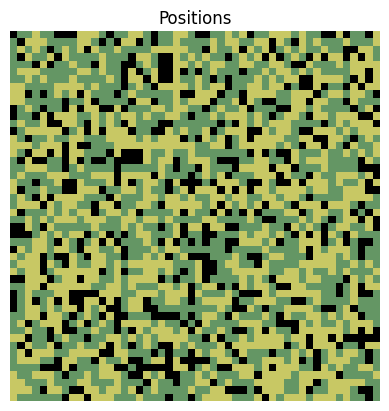

unsatisfied = 0.0005


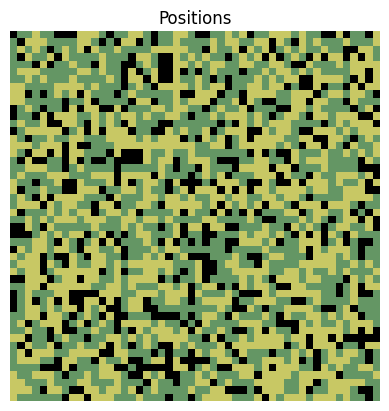

unsatisfied = 0.0005


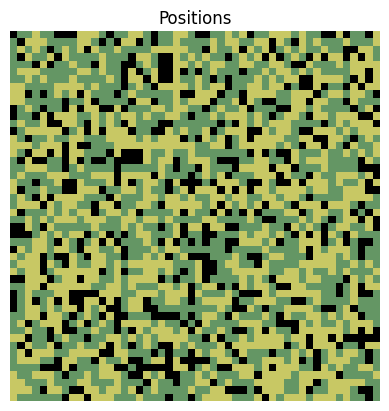

unsatisfied = 0.0005


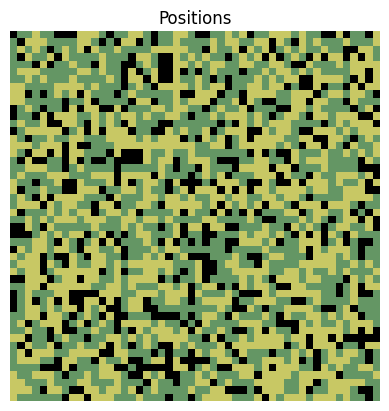

unsatisfied = 0.0005


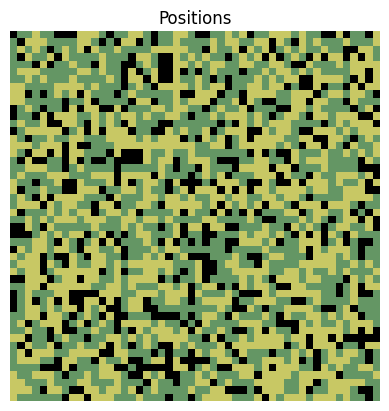

unsatisfied = 0.0005


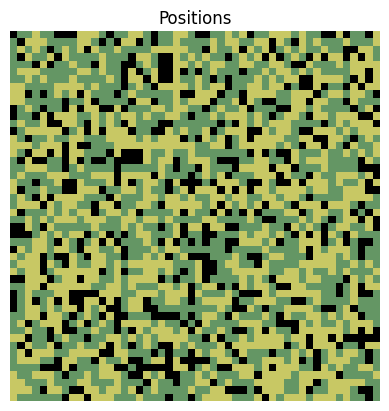

unsatisfied = 0.0005


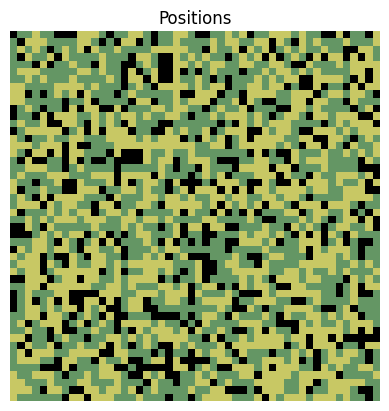

unsatisfied = 0.0005


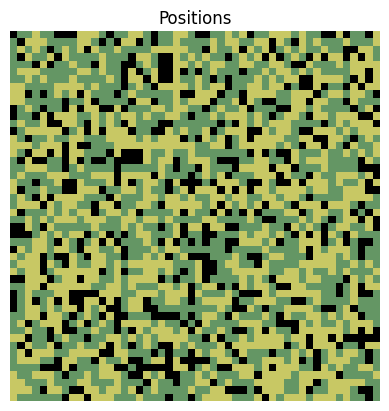

Initial State:


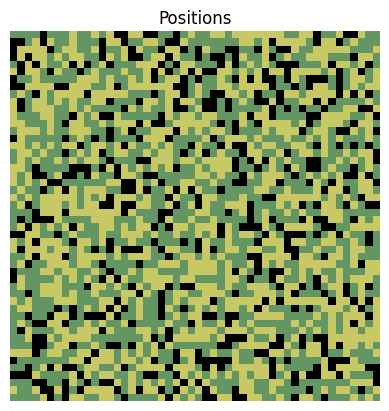

unsatisfied = 0.132


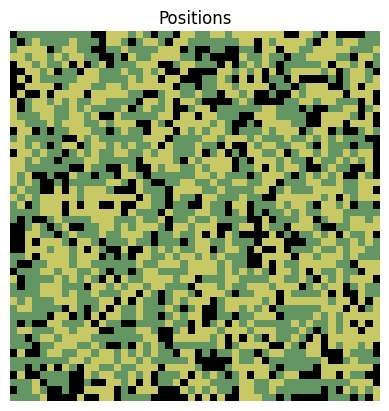

unsatisfied = 0.0005


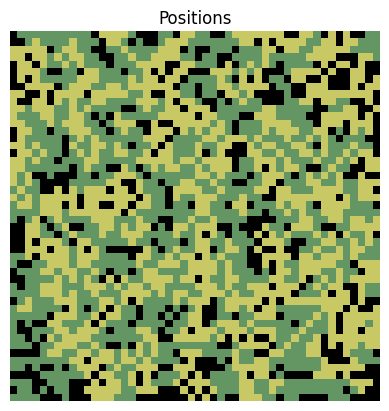

unsatisfied = 0.0005


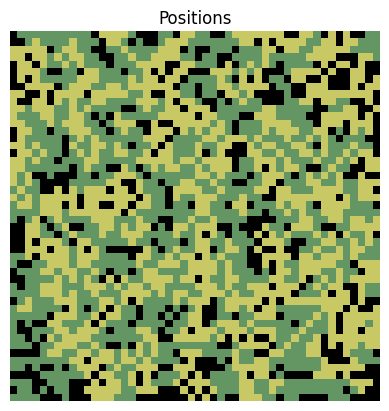

unsatisfied = 0.0005


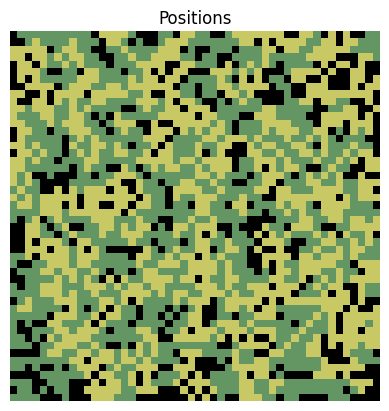

unsatisfied = 0.0005


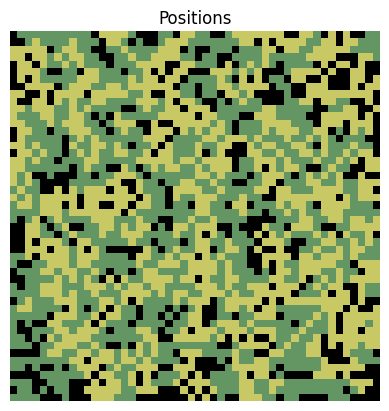

unsatisfied = 0.0005


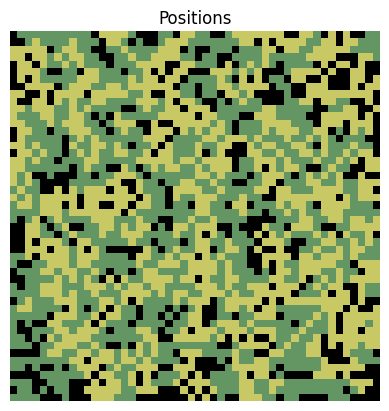

unsatisfied = 0.0005


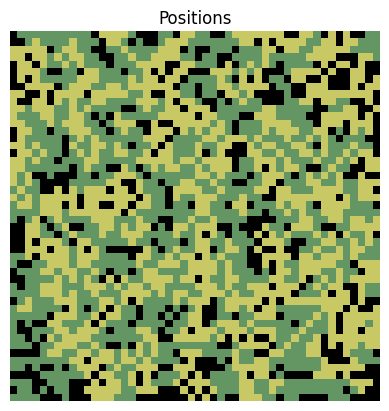

unsatisfied = 0.0005


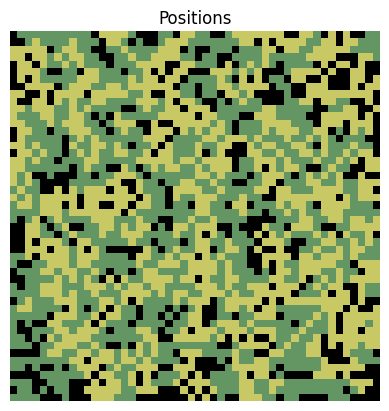

unsatisfied = 0.0005


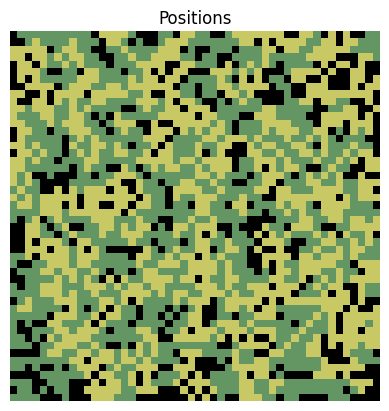

unsatisfied = 0.0005


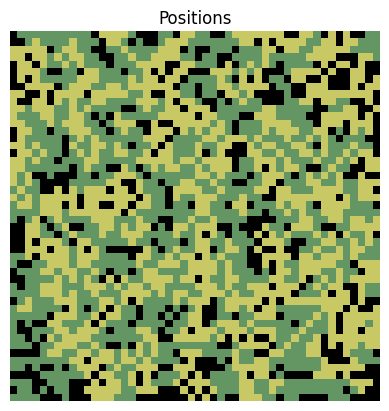

Initial State:


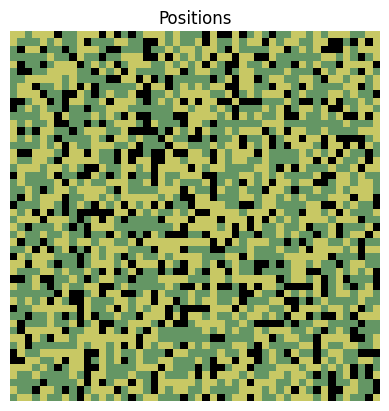

unsatisfied = 0.3275


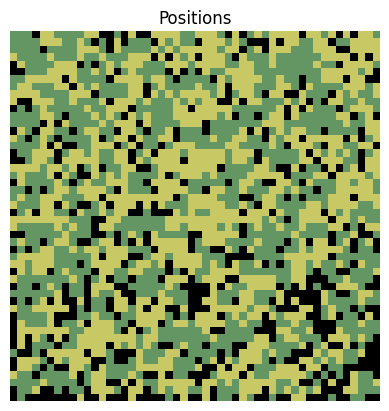

unsatisfied = 0.0005


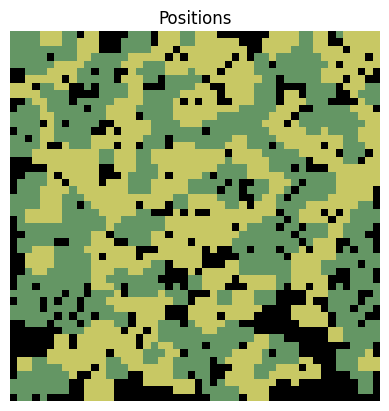

unsatisfied = 0.0005


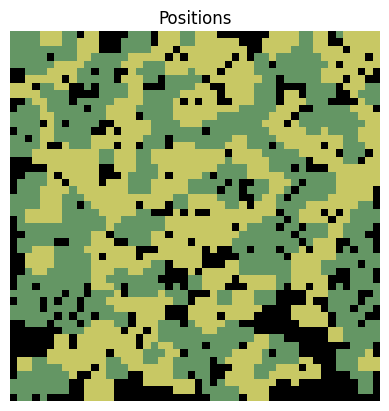

unsatisfied = 0.0005


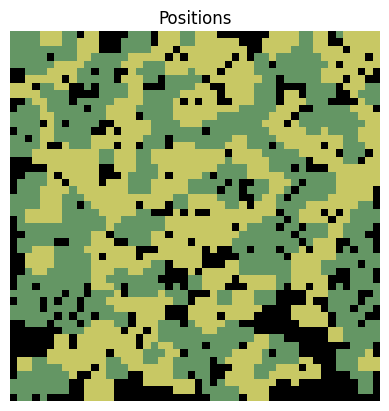

unsatisfied = 0.0005


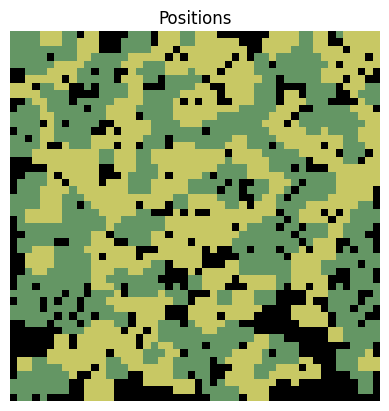

unsatisfied = 0.0005


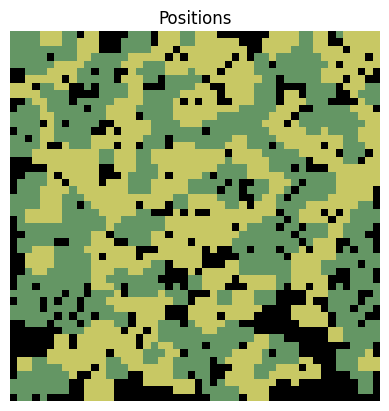

unsatisfied = 0.0005


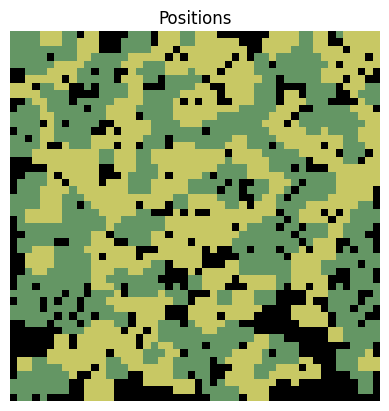

unsatisfied = 0.0005


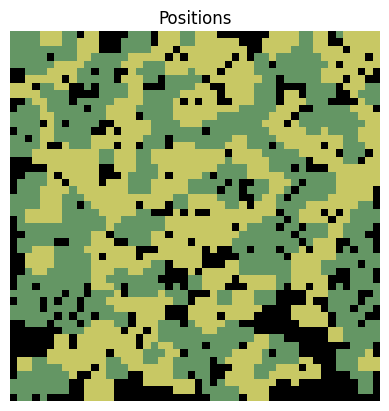

unsatisfied = 0.0005


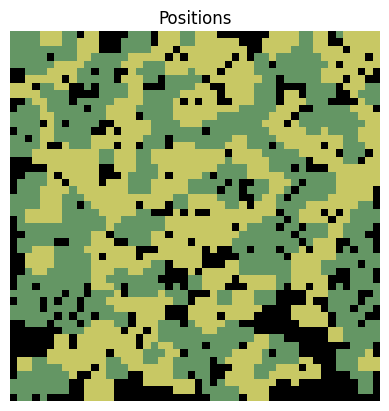

unsatisfied = 0.0005


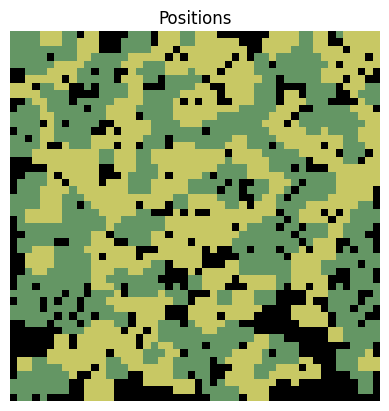

Initial State:


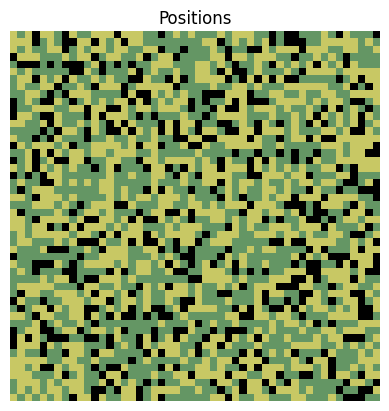

unsatisfied = 0.6165


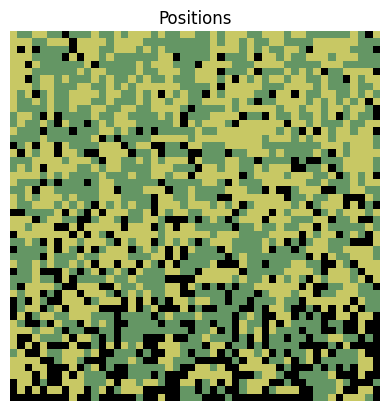

unsatisfied = 0.0055


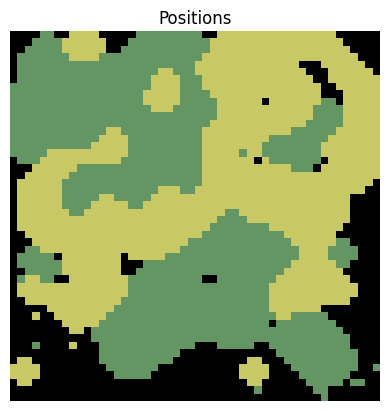

unsatisfied = 0.0005


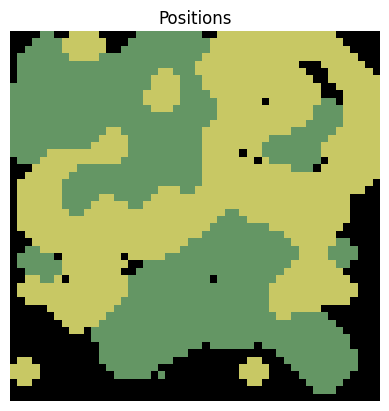

unsatisfied = 0.0005


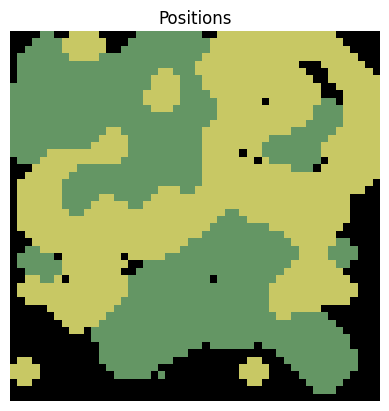

unsatisfied = 0.0005


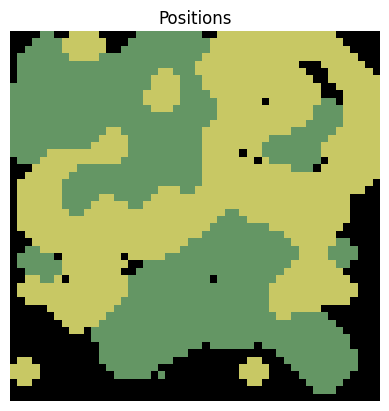

unsatisfied = 0.0005


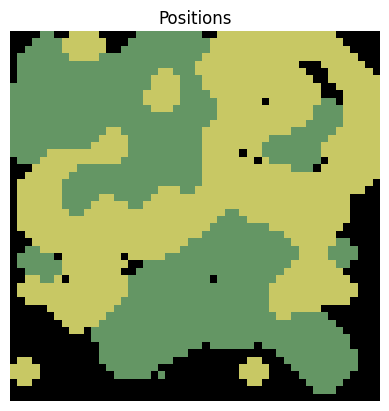

unsatisfied = 0.0005


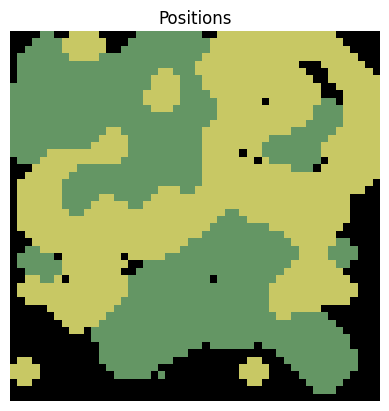

unsatisfied = 0.0005


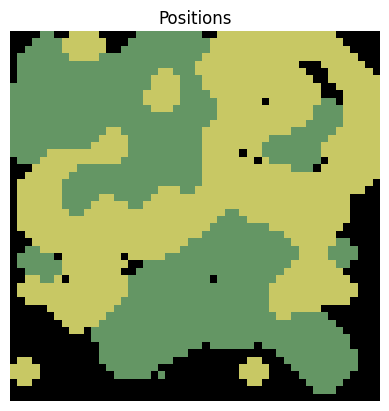

unsatisfied = 0.0005


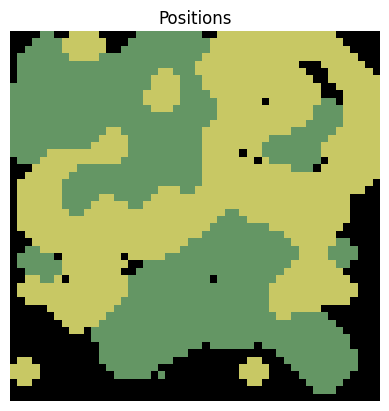

unsatisfied = 0.0005


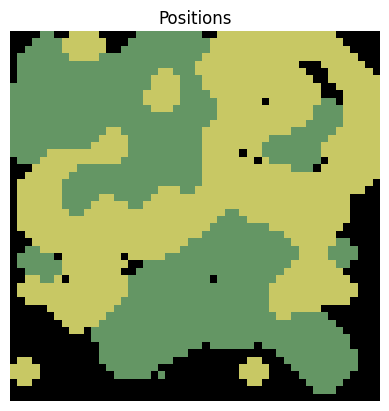

Initial State:


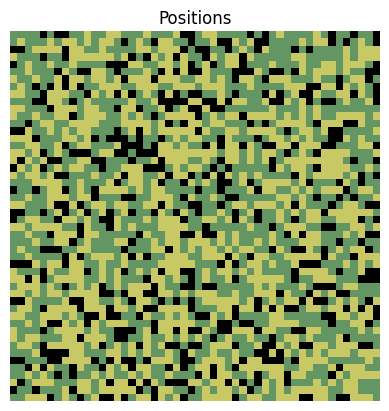

unsatisfied = 0.8165


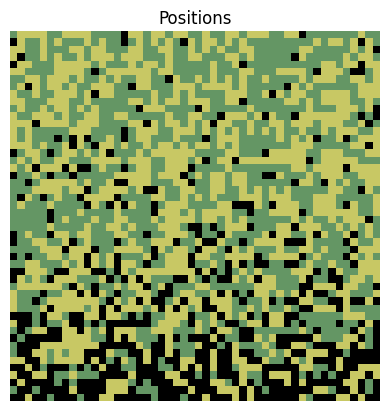

unsatisfied = 0.265


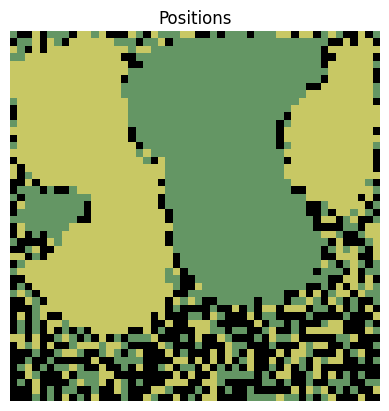

unsatisfied = 0.2635


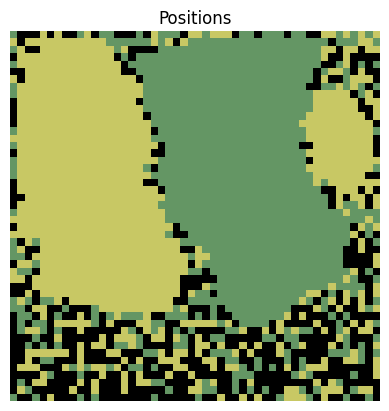

unsatisfied = 0.254


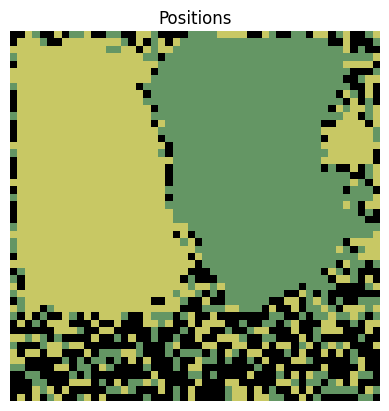

unsatisfied = 0.2265


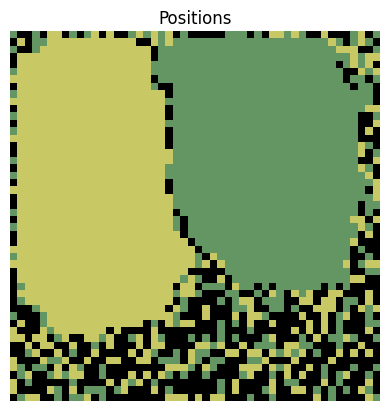

unsatisfied = 0.2275


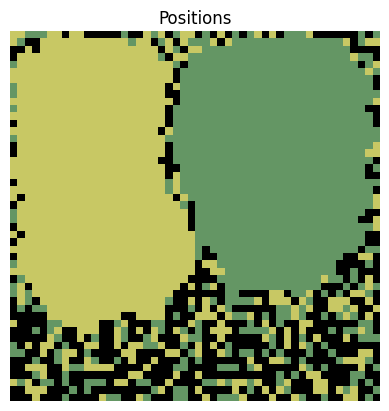

unsatisfied = 0.2355


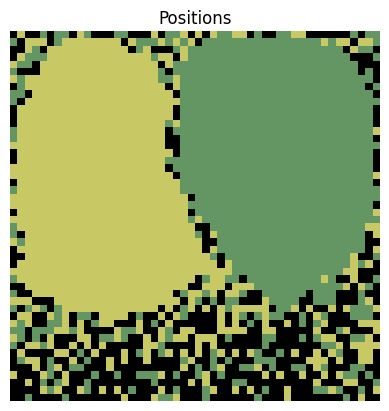

unsatisfied = 0.236


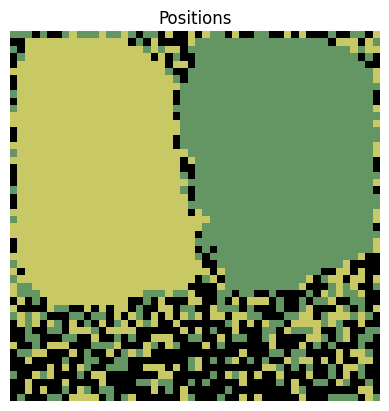

unsatisfied = 0.209


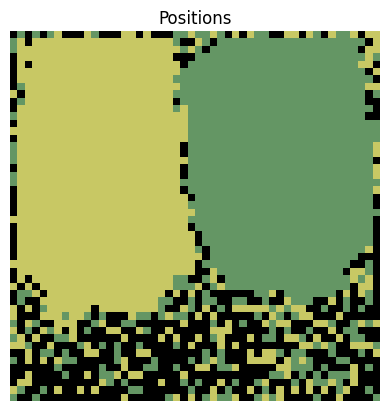

unsatisfied = 0.228


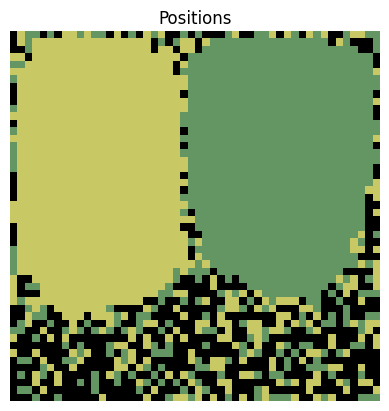

Initial State:


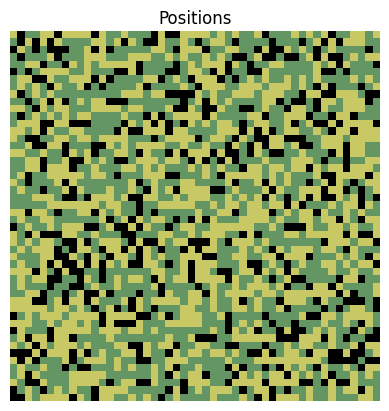

unsatisfied = 0.952


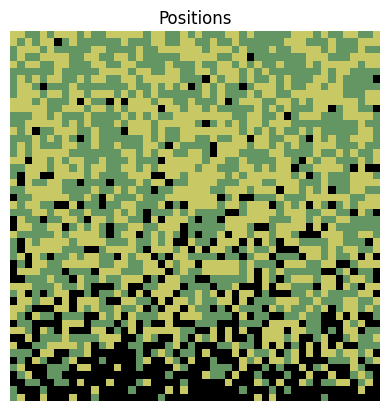

unsatisfied = 0.7565


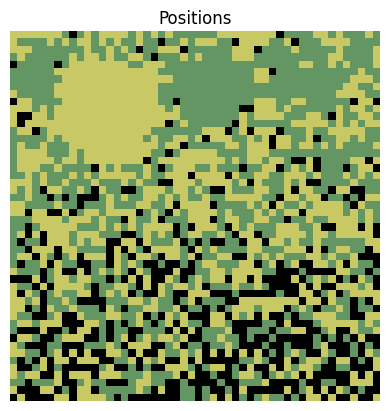

unsatisfied = 0.667


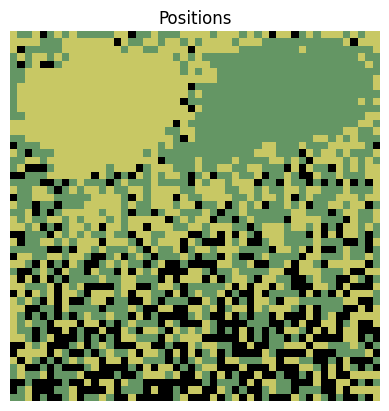

unsatisfied = 0.71


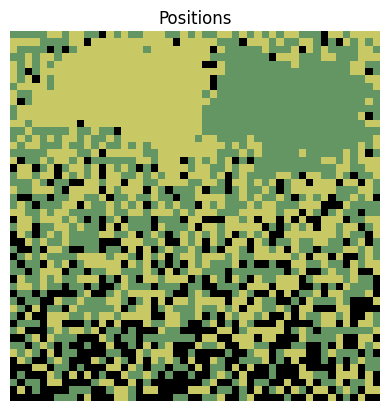

unsatisfied = 0.6685


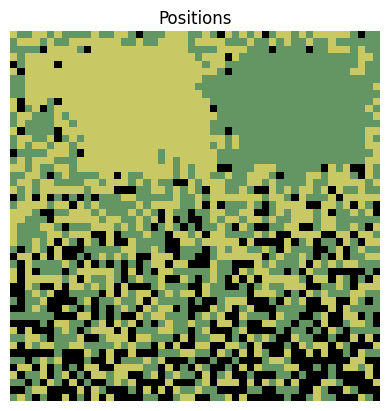

unsatisfied = 0.654


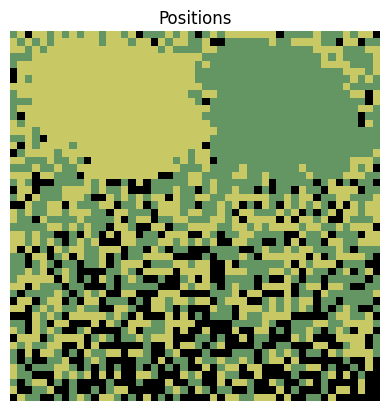

unsatisfied = 0.654


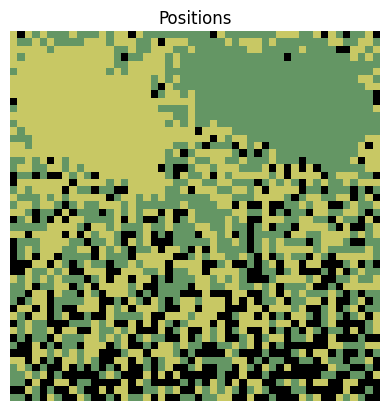

unsatisfied = 0.6985


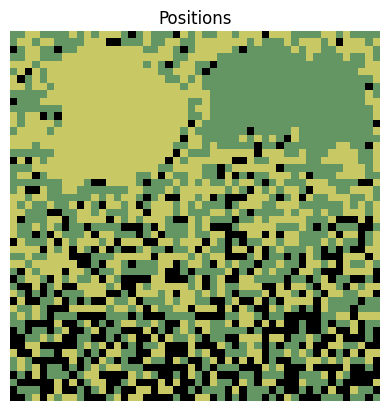

unsatisfied = 0.704


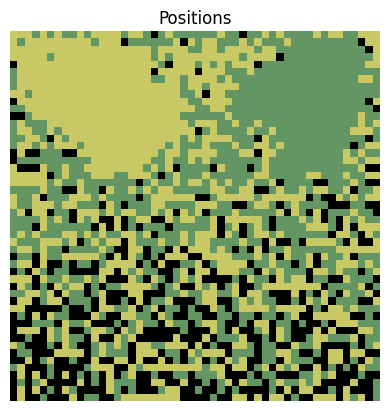

unsatisfied = 0.6845


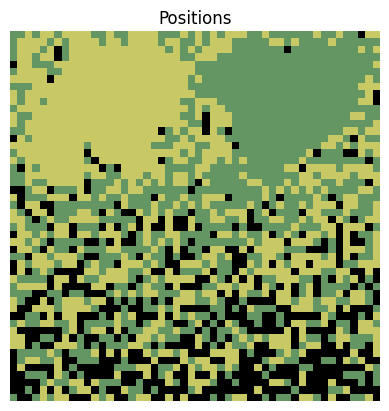

Initial State:


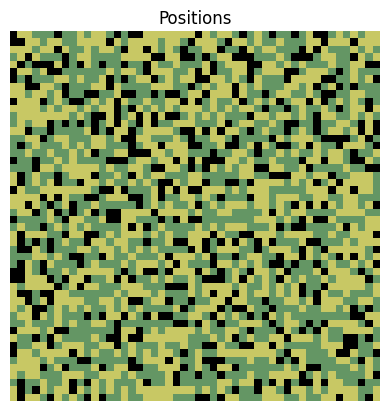

unsatisfied = 0.9945


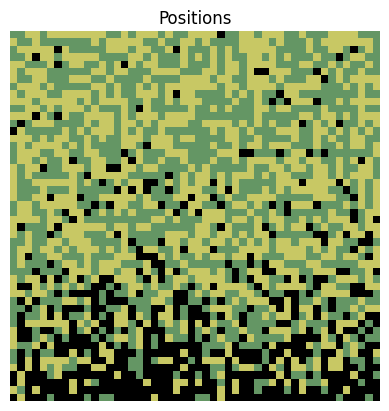

unsatisfied = 0.9905


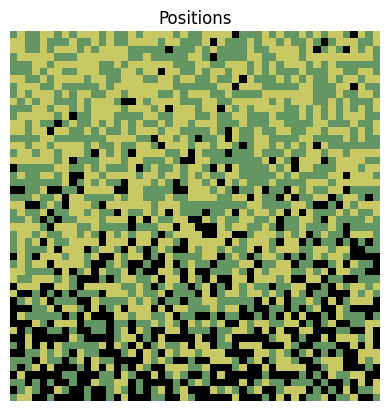

unsatisfied = 0.981


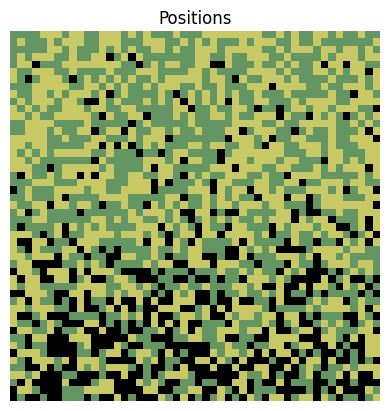

unsatisfied = 0.9865


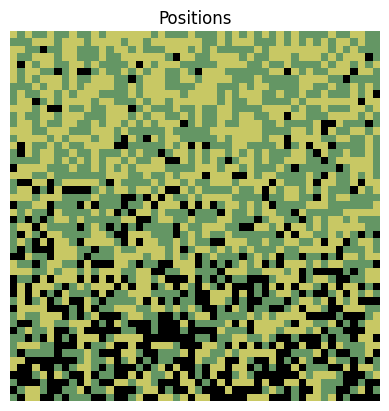

unsatisfied = 0.984


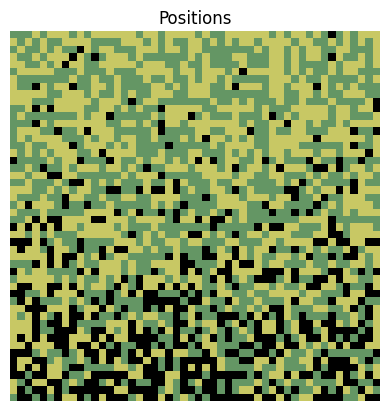

unsatisfied = 0.9935


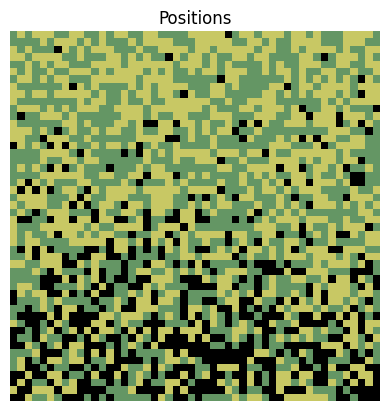

unsatisfied = 0.9835


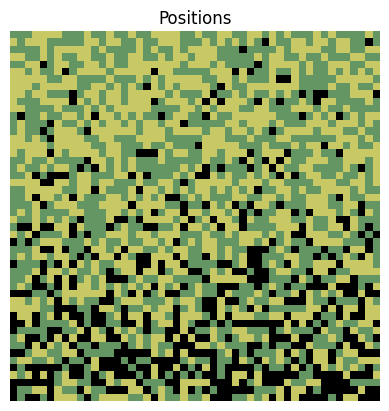

unsatisfied = 0.9885


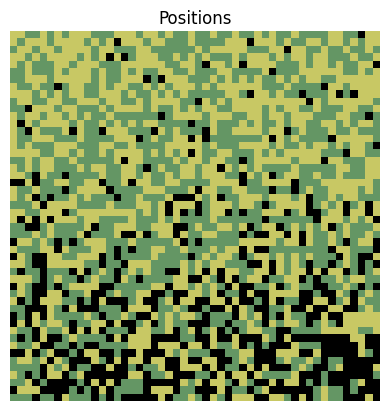

unsatisfied = 0.9875


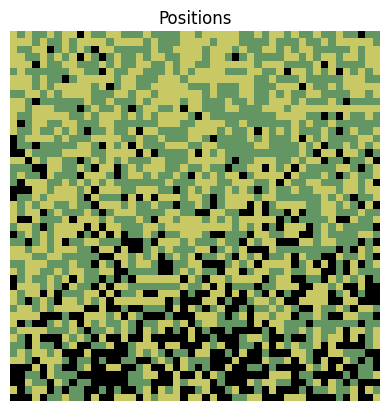

unsatisfied = 0.978


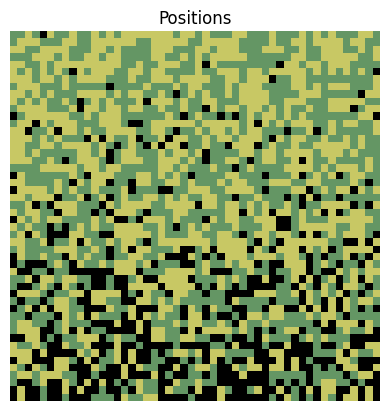

In [4]:
import copy

# Функция для подсчёта хороших соседей заданной клетки
def count_neighbors(x, y, grid, color):
    neighbors = 0
    for i in range(max(x-1, 0), min(x+2, w)):
        for j in range(max(y-1, 0), min(y+2, h)):
            if (i, j) != (x, y) and grid[i][j] == color :
                neighbors += 1
    return neighbors

def compare_arrays(array1, array2):
    # Поэлементно сравниваем все элементы
    for i in range(len(array1)):
        for j in range(len(array1[0])):
            if array1[i][j] != array2[i][j]:
                return False
    return True

def simulate_step(grid):
    temp_grid = grid
    unsatisfied = []
    n_unsatisfied = 0
    n_same_color_neighbors = 0
    new_grid = copy.deepcopy(grid)
    for i in range(w):
        for j in range(h):
            inhabitant = temp_grid[i][j]
            if inhabitant != 'none':
                n_neighbors = count_neighbors(i, j, temp_grid, inhabitant)
                if n_neighbors / 8 < epsilon:
                    unsatisfied.append((i, j))
                    n_unsatisfied += 1
                n_same_color_neighbors += n_neighbors / (n_left + n_right)
        for _ in range(n_unsatisfied):
            x, y = random.randint(0, w - 1), random.randint(0, h - 1)
            while new_grid[x][y] != 'none':
                x, y = random.randint(0, w - 1), random.randint(0, h - 1)
            if(len(unsatisfied) > 1):
              i, j = unsatisfied.pop(random.randint(0, len(unsatisfied) - 1))
              inhabitant = temp_grid[i][j]
              new_grid[x][y] = inhabitant
              new_grid[i][j] = 'none'
    
    is_diff_state = not compare_arrays(temp_grid, new_grid)
    return copy.deepcopy(new_grid), is_diff_state, n_unsatisfied / (n_left + n_right), n_same_color_neighbors / (n_left + n_right)

def plot_grid(grid):
    heatmap_data = [[0 for _ in range(w)] for _ in range(h)]
    for i in range(w):
        for j in range(h):
            inhabitant = grid[i][j]
            heatmap_data[i][j] = color_map[inhabitant]

    plt.imshow(heatmap_data)
    plt.axis('off')
    plt.title('Positions')
    plt.show()
#--------------------------
stats = pd.DataFrame(columns=['t', 'percent_unsatisfied', 'avg_same_color_neighbors', 'epsilon'])
# Запускаем симуляцию и собераем статистику.
for i in range(0, 8):
    # Максимальное количество соседей 8. Значит зависимость от одного соседа 1 / 8 = 0.125 
    epsilon = 0.125 * i
    init_grid = [['none' for _ in range(w)] for _ in range(h)]
    for _ in range(n_left):
        while True:
            x, y = random.randint(0, w - 1), random.randint(0, h - 1)
            if init_grid[x][y] == 'none':
                init_grid[x][y] = 'left'
                break
            
    for _ in range(n_right):
        while True:
            x, y = random.randint(0, w - 1), random.randint(0, h - 1)
            if init_grid[x][y] == 'none':
                init_grid[x][y] = 'right'
                break    
    t = 0
    print("Initial State:")
    plot_grid(init_grid)
    while t < T:
        init_grid, is_changed, percent_unsatisfied, avg_same_color_neighbors = simulate_step(init_grid)
        stats = pd.concat([stats, pd.DataFrame({'t':[t], 'percent_unsatisfied':[percent_unsatisfied], 'avg_same_color_neighbors':[avg_same_color_neighbors], 'epsilon':[epsilon]})], ignore_index=True)
        if (t) % 100 == 0:
            print(f'unsatisfied = {percent_unsatisfied}')
            plot_grid(init_grid)
        if percent_unsatisfied <= 1e-5:
            plot_grid(init_grid)
            break
        t += 1

In [5]:
stats

,t,percent_unsatisfied,avg_same_color_neighbors,epsilon
0,0,0.0000,0.001566,0.000
1,0,0.0220,0.001548,0.125
2,1,0.0010,0.001622,0.125
3,2,0.0005,0.001623,0.125
4,3,0.0005,0.001623,0.125
...,...,...,...,...
6996,995,0.9895,0.001606,0.875
6997,996,0.9835,0.001590,0.875
6998,997,0.9875,0.001629,0.875
6999,998,0.9865,0.001608,0.875


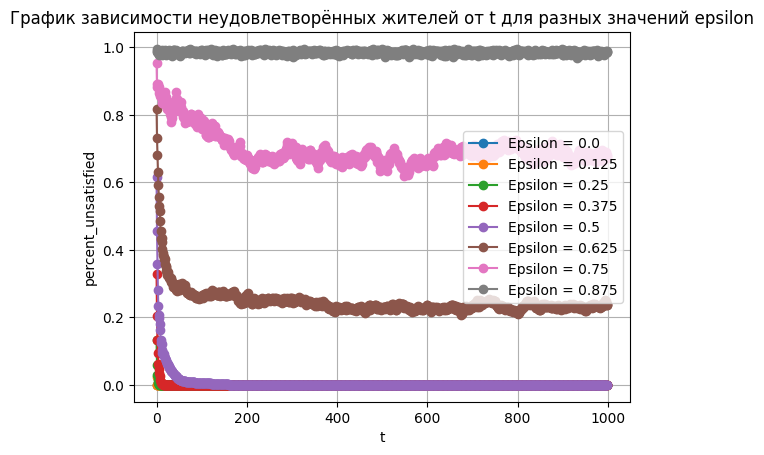

In [6]:
epsilons = stats['epsilon'].unique()

for epsilon in epsilons:
    subset = stats[stats['epsilon'] == epsilon]
    
    plt.plot(subset['t'], subset['percent_unsatisfied'], marker='o', linestyle='-', label=f'Epsilon = {epsilon}')

plt.xlabel('t')
plt.ylabel('percent_unsatisfied')
plt.title('График зависимости неудовлетворённых жителей от t для разных значений epsilon')

plt.legend()

plt.grid(True)
plt.show()

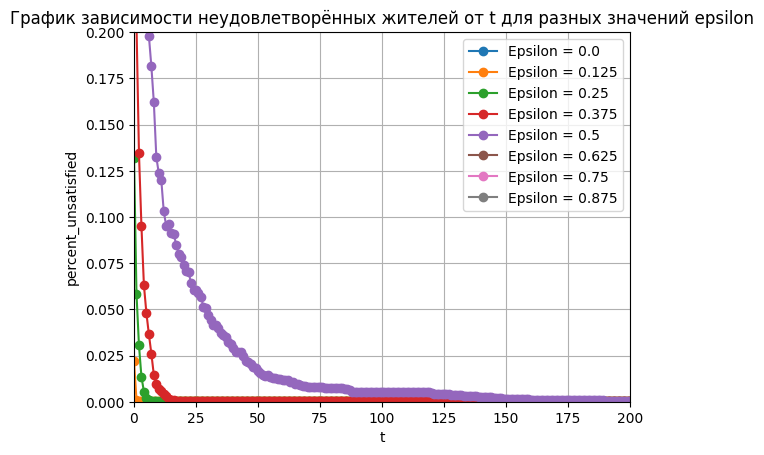

In [7]:
epsilons = stats['epsilon'].unique()

for epsilon in epsilons:
    subset = stats[stats['epsilon'] == epsilon]
    
    plt.plot(subset['t'], subset['percent_unsatisfied'], marker='o', linestyle='-', label=f'Epsilon = {epsilon}')

plt.xlabel('t')
plt.ylabel('percent_unsatisfied')
plt.title('График зависимости неудовлетворённых жителей от t для разных значений epsilon')

plt.legend()

# Установите пределы для осей x и y
plt.xlim(0, 200)
plt.ylim(0, 0.2)

plt.grid(True)
plt.show()